--- 5 Baris Pertama Data ---


/tmp/ipython-input-1626537622.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', names=cols, delim_whitespace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


/tmp/ipython-input-1626537622.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_hp, inplace=True)



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

--- Cek Nilai Unik Horsepower (Sebelum Cleaning) ---
['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
--- Evaluasi Deep Learning ---
MAE: 1.8187
MSE: 6.0263
R2 Score: 0.8879

--- Perbandingan Performa Model ---


,MAE,MSE,R2
Baseline,5.955409,53.983298,-0.004033
Random Forest,1.577338,4.584260,0.914738
Deep Learning,1.818687,6.026316,0.887917


/tmp/ipython-input-1626537622.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res_df.index, y=res_df['R2'], palette="viridis")


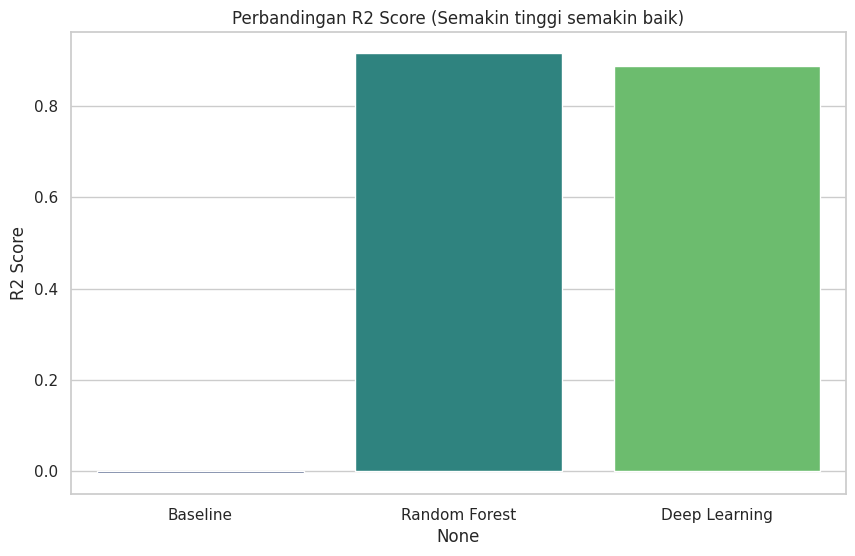

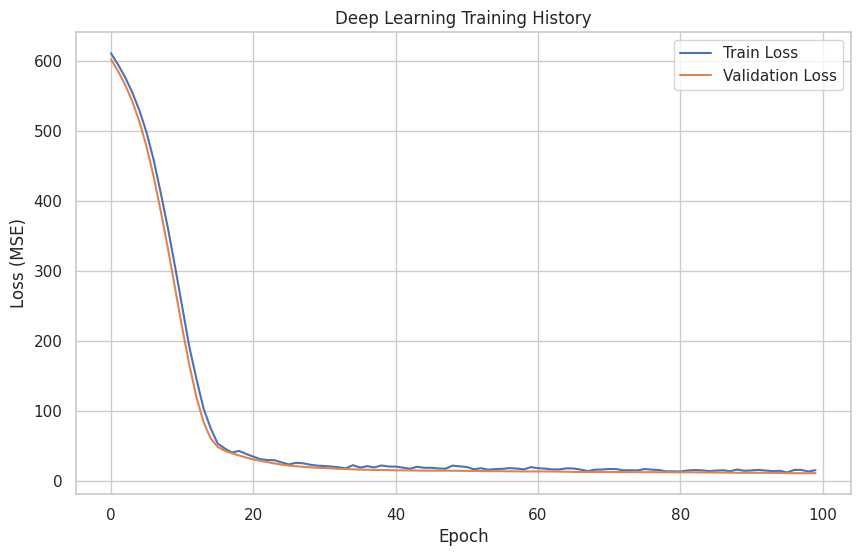

In [1]:
# ==========================================
# 1. INFORMASI PROYEK & LIBRARY
# ==========================================
# Judul: Analisis Prediksi Konsumsi Bahan Bakar (MPG) Menggunakan Baseline, Machine Learning, dan Deep Learning
# Dataset: Auto MPG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library untuk Model
from sklearn.dummy import DummyRegressor # Baseline
from sklearn.ensemble import RandomForestRegressor # Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Setup visualisasi
sns.set(style="whitegrid")

# ==========================================
# 2. DATA LOADING & UNDERSTANDING
# ==========================================
# Mendefinisikan nama kolom karena file asli tidak memiliki header
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model_year', 'origin', 'car_name']

# Membaca dataset (menggunakan delim_whitespace=True karena pemisah spasi tidak beraturan)
# Pastikan file 'auto-mpg.data' sudah diupload ke environment Anda
df = pd.read_csv('auto-mpg.data', names=cols, delim_whitespace=True)

print("--- 5 Baris Pertama Data ---")
display(df.head())

print("\n--- Info Dataset ---")
print(df.info())

# ==========================================
# 3. DATA PREPARATION (CLEANING)
# ==========================================
# Masalah diketahui: Kolom 'horsepower' memiliki nilai '?'
print("\n--- Cek Nilai Unik Horsepower (Sebelum Cleaning) ---")
print(df['horsepower'].unique())

# Mengubah '?' menjadi NaN lalu mengubah tipe data menjadi float
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)

# Mengisi nilai NaN dengan median (Imputasi)
median_hp = df['horsepower'].median()
df['horsepower'].fillna(median_hp, inplace=True)

print(f"\n--- Missing Values setelah cleaning: {df['horsepower'].isnull().sum()} ---")

# Drop kolom 'car_name' karena string unik (ID) tidak dipakai untuk prediksi
df = df.drop(columns=['car_name'])

# Fitur (X) dan Target (y)
X = df.drop(columns=['mpg'])
y = df['mpg']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Scaling (Penting untuk Deep Learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDimensi Training: {X_train.shape}, Dimensi Testing: {X_test.shape}")

# ==========================================
# 4. MODELING
# ==========================================

# Dictionary untuk menyimpan hasil evaluasi
results = {}

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- Evaluasi {name} ---")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

# --- A. Baseline Model (Dummy Regressor) ---
# Model ini memprediksi nilai rata-rata (mean) untuk semua data
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
results['Baseline'] = evaluate_model('Baseline Model', y_test, y_pred_base)

# --- B. Machine Learning Model (Random Forest) ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = evaluate_model('Random Forest', y_test, y_pred_rf)

# --- C. Deep Learning Model (Neural Network) ---
# Membangun arsitektur Sequential
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Hidden Layer 1
    Dropout(0.2), # Mencegah overfitting
    Dense(32, activation='relu'), # Hidden Layer 2
    Dense(1) # Output Layer (1 neuron karena regresi)
])

# Compile model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0 # Set ke 1 jika ingin melihat proses training
)

# Prediksi
y_pred_dl = dl_model.predict(X_test_scaled).flatten()
results['Deep Learning'] = evaluate_model('Deep Learning', y_test, y_pred_dl)

# ==========================================
# 5. KOMPARASI & VISUALISASI HASIL
# ==========================================
# Membuat DataFrame dari hasil
res_df = pd.DataFrame(results).T

print("--- Perbandingan Performa Model ---")
display(res_df)

# Plot Bar Chart R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x=res_df.index, y=res_df['R2'], palette="viridis")
plt.title("Perbandingan R2 Score (Semakin tinggi semakin baik)")
plt.ylabel("R2 Score")
plt.show()

# Plot Loss History untuk Deep Learning
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Deep Learning Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()